In [14]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint 

In [15]:
# File to Load 
ev_data = "Electric_Vehicle_Population_Data.csv"

In [16]:
# Read Student Data File and store into Pandas DataFrames
electric_df = pd.read_csv(ev_data)
electric_df.head()

,make,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
0,Toyota,Prius Prime,2018,OLYMPIA,WA,98502,168473210,25,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.97996899999998 47.078241),27300
1,Toyota,Prius Prime,2018,KENT,WA,98031,9585145,25,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.196448 47.40561),27300
2,Ford,Fusion Energi,2017,FEDERAL WAY,WA,98023,8877823,21,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.362029 47.308531),33120
3,Bmw,I3,2018,SEATTLE,WA,98136,474613408,114,Battery Electric Vehicle (BEV),POINT (-122.38895500000001 47.537382),44450
4,Ford,Focus,2013,KENT,WA,98032,252574269,76,Battery Electric Vehicle (BEV),POINT (-122.26132099999998 47.390601),39200


In [22]:
ev_car_df = electric_df.groupby("make")["model"].count()
ev_car_df

make
Audi                      936
Azure Dynamics              9
Bmw                      2569
Cadillac                   96
Chevrolet                7908
Chrysler                  743
Dodge                       1
Fiat                      720
Fisker                     17
Ford                     3610
Honda                     631
Hyundai                   837
Jaguar                    157
Kia                      2172
Land Rover                 25
Lincoln                    11
Mercedes-Benz             230
Mini                      149
Mitsubishi                384
Nissan                  10947
Porsche                   299
Smart                     241
Subaru                     41
Tesla                   23368
Th!Nk                       4
Toyota                   2748
Volkswagen                928
Volvo                     536
Wheego Electric Cars        2
Name: model, dtype: int64

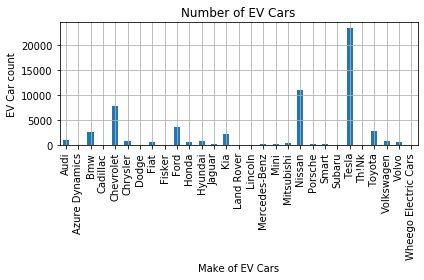

In [31]:
ev_car_chart = ev_car_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
ev_car_chart.set_xlabel("Make of EV Cars")
ev_car_chart.set_ylabel("EV Car count")
ev_car_chart.set_title("Number of EV Cars")
plt.tight_layout()
plt.grid()
plt.show()


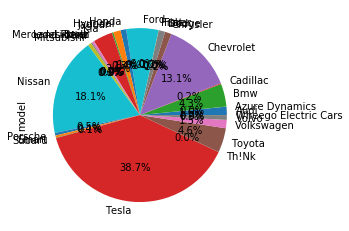

In [36]:
# Generate a pie plot showing the distribution of Ev Cars
ev_car_df.plot(kind ="pie", autopct = "%1.1f%%")
plt.show()